## Introduction

Bitcoin is the first cryptocurrency that originated in 2008 from the famous whitepaper by Satoshi Nakamoto (pseudonym), titled "Bitcoin: A Peer-to-Peer Electronic Cash System" [1]. Since then, Bitcoin (BTC) has dominated the cryptocurrency industry and has passed multiple narratives and possible use cases. Lately, there has been a lot of talk about BTC's potential as an inflation hedge. BTC is often dubbed the "digital gold", and even some valuation models use gold's market cap to evaluate BTC's potential market cap and target price. In this report, we will explore how the price of BTC compares to the SP500 and gold in terms of price and volatility. Finally, we will elucidate if BTC could be used as a hedge against inflation and its place in the investor's portfolio. 

## Exploring the data

In the next part, we will go through exploratory data analysis, take a first look into the data, check for missing values, and produce basic charts.

In [ ]:
# A first look into the BTC data
import pandas as pd
bitcoin = pd.read_csv('./data/bitcoin-usd.csv', parse_dates=['date'])
bitcoin.head()


,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [ ]:
# First look into SP500 data
sp500 = pd.read_csv('./data/sp500.csv', parse_dates=['date'])
sp500.head()

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
3,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
4,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [ ]:
# First look into CPI and gold price monthly data
monthly_data = pd.read_csv('./data/monthly_data.csv', parse_dates=['date'])
monthly_data.head()

,date,gold_usd,cpi_us
0,2014-09-01,1241.330,237.852
1,2014-10-01,1223.565,238.031
2,2014-11-01,1176.413,237.433
3,2014-12-01,1200.440,236.151
4,2015-01-01,1249.333,234.812


In [ ]:
# Exploratory data analysis

# Checking for missing values:
# BTC missing values?
btc_miss= pd.isnull(bitcoin["close"])
bitcoin[btc_miss]
bitcoin.isna().sum()
btc_new= bitcoin.dropna()

# We have found 4 examples with missing values. The examples were droped and new dataframe without NaNs was created.

In [ ]:
# SP500 missing values?
snp_miss= pd.isnull(sp500["close"])
sp500[snp_miss]

# SPY has no missing values.

,date,open,high,low,close,volume


In [ ]:
# Gold missing values?
gold_miss= pd.isnull(monthly_data["gold_usd"])
monthly_data[gold_miss]



,date,gold_usd,cpi_us


In [ ]:
# CPI missing values?
cpi_miss= pd.isnull(monthly_data["cpi_us"])
monthly_data[cpi_miss]

# GLD and CPI have no missing values

,date,gold_usd,cpi_us


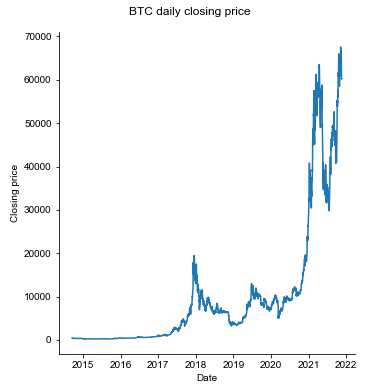

In [ ]:
# Lets see how BTC price behaved through the years

import seaborn as sns
import matplotlib.pyplot as plt

b = sns.relplot(x="date", y="close",data=btc_new, kind="line")
b.fig.suptitle("BTC daily closing price", y=1.04)
b.set(xlabel= "Date", ylabel="Closing price")
sns.set_style("whitegrid")
sns.set_context("paper")
plt.show()

# We can see that the price chart of BTC shows an exponential trend.

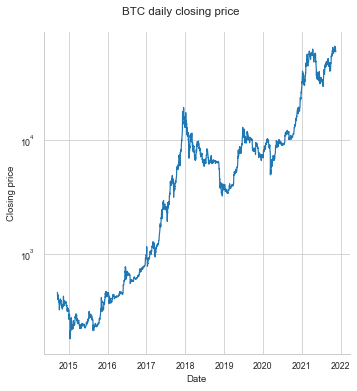

In [ ]:
# Lets check how the BTC price chart will behave on a log scale:
b2 = sns.relplot(x="date", y="close",data=btc_new, kind="line")
b2.fig.suptitle("BTC daily closing price", y=1.04)
b2.set(xlabel= "Date", ylabel="Closing price")
b2.set(yscale="log")
sns.set_style("whitegrid")
sns.set_context("paper")
plt.show()

# This confirms the exponential behavior of BTC price.

In the BTC daily closing price graphs shown above, we can see the exponential nature of BTC's rise in value, albeit also with a lot of volatility.

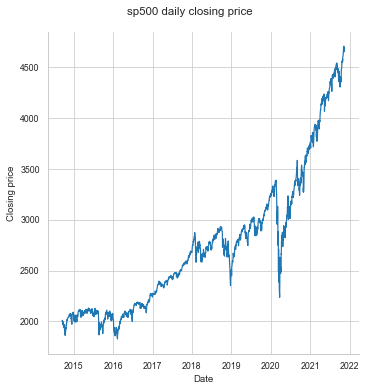

In [ ]:
# SPY closing price in the last 7 years

snp= sns.relplot(x="date", y="close", data=sp500, kind="line")
snp.fig.suptitle("sp500 daily closing price", y=1.04)
snp.set(xlabel= "Date", ylabel="Closing price")
sns.set_style("whitegrid")
sns.set_context("paper")
plt.show()


The SP500 daily closing price graph shows us the rise of SP500. We can notice the significant drawdown that occurred in March of 2020 due to the COVID-19 pandemic. Further, we see a rapid increase in SP500 value that started after the Central banks' monetary policies and the US Government's fiscal policies resulted in increased liquidity and favorable market conditions.

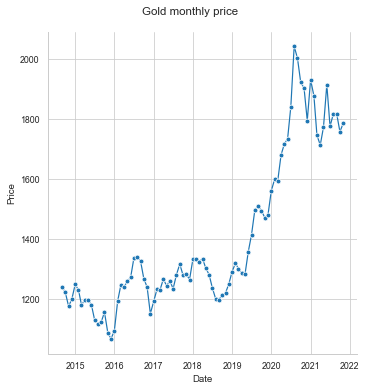

In [ ]:
# Monthly gold price chart

gld= sns.relplot(x="date", y="gold_usd", kind="line", data=monthly_data, marker="o")
gld.fig.suptitle("Gold monthly price", y=1.04)
gld.set(xlabel= "Date", ylabel= "Price")

sns.set_style("whitegrid")
sns.set_context("paper")
plt.show()

## Materials and methods
The data used in this project is originating from the following datasets: 1)'./data/bitcoin-usd.csv', 2) './data/sp500.csv', 3) './data/monthly_data.csv'. The project is made through the use of DataCamp Workspace and the Python coding language, with its pandas, matplotlib, seaborn and scipy packages.

### Calculating the returns and volatility

This part will calculate and then compare the returns between BTC, SP500, and GLD. Further, we will also produce and compare the said assets' standard deviations (volatility).

In [ ]:
# Lets calculate the average monthly return of BTC
# TotalReturn = (Ending Value - Initial Value)/Initial Value
btcTotal_Return= (bitcoin.iloc[-1][-2] - bitcoin.iloc[0][-2]) / bitcoin.iloc[0][-2]


btcTotal_Return_ptc= btcTotal_Return*100 

print("The total return of BTC is : " + str(btcTotal_Return_ptc)+ " %")

# There are 86 months from September, 2014 to November, 2021, so the average monthly return is:

btc_avg_mon= (btcTotal_Return/86) * 100
print(" BTC's average monthly return : " + str(btc_avg_mon) + " %")

The total return of BTC is : 13079.870570090878 %
 BTC's average monthly return : 152.09151825687067 %


In [ ]:
# Okay, great, so in this timeframe, BTC had an average monthly return of 152 %! Sounds good, but what about volatility? Lets use the Sharpe ratio over the last year

# Firstly, how much did BTC return over the last year, from 01.01.2021 to 17.11.2021
import pandas as pd
btc_date= bitcoin.set_index("date")
btc_Last_Year= ((btc_date.loc["2021-11-16", "close"] - btc_date.loc["2021-01-01", "close"]) / btc_date.loc["2021-01-01", "close"]) * 100

print("BTC's return over the last year: " + str(btc_Last_Year) +" %")

BTC's return over the last year: 104.81015210057156 %


In [ ]:
# So in the last year BTC returned 104.8 %. To proceed, we need to calculate volatility.

# What is the average price in the last year?
btc2021= btc_date.loc["2021-01-01":"2021-11-16"]
avg_btc2021= btc2021["close"].mean()

# What was the volatility? ; Volatility = standard deviation
std_btc2021= (btc2021["close"].std() / avg_btc2021) * 100

print("Average price of BTC in 2021 : " + str(avg_btc2021))
print("Volatility of BTC through 2021 : " + str(std_btc2021))

# What is the volatility for the entire bitcoin dataset?
std_btc= (bitcoin["close"].std() / bitcoin["close"].mean()) * 100
print("BTC's volatility from Sep2014 to Nov 2021 : " + str(std_btc))

# Lets calculate the Sharpe ratio = (Return of portfolio - Risk free rate) / Volatility ; for the Risk free rate we take the latest 10 year US Tresury yield (1.35)
btc_Sharpe2021= ((btc_Last_Year - 1.35) / std_btc2021) / 100
print("Bitcoin 2021 Sharpe ratio = "+ str(btc_Sharpe2021))

btc_sharpe = ((btcTotal_Return_ptc - 1.35) / std_btc) / 100
print("Bitcoin Sharpe ratio since Sep 2014 = " + str(btc_sharpe))

Average price of BTC in 2021 : 46824.337658784374
Volatility of BTC through 2021 : 21.748736589022457
BTC's volatility from Sep2014 to Nov 2021 : 148.13723022861686
Bitcoin 2021 Sharpe ratio = 0.04757064930051728
Bitcoin Sharpe ratio since Sep 2014 = 0.8828652020769587


In [ ]:
# What is the Sharpe ratio for the SP500?
import pandas as pd

snp_Total_Return= ((sp500.iloc[-1][-2] - sp500.iloc[0][-2]) / sp500.iloc[0][-2])* 100
print("The total return of SP500 from Sep 2014 to Nov 2021 is : " + "{:.2f}".format(snp_Total_Return) + " %")

snp_date=sp500.set_index("date")

snp_2021_Return = ((snp_date.loc["2021-11-15", "close"] - snp_date.loc["2021-01-04", "close"]) / snp_date.loc["2021-01-04", "close"]) * 100
print("SP500 return in 2021 : " + "{:.2f}".format(snp_2021_Return))
# What is the volatility for the entire SP500 dataset?
std_snp= (sp500["close"].std() / sp500["close"].mean()) * 100
print("SP500 volatility " + "{:.2f}".format(std_snp))
# SP500 Sharpe ratio since Nov Sep 2014
snp_sharpe= ((snp_Total_Return - 1.35) / std_snp) / 100
print("SP500 Sharpe ratio since Sep 2014 " + "{:.2f}".format(snp_sharpe))

# SP500 Sharpe ratio in 2021:
snp2021= snp_date.loc["2021-01-04":"2021-11-15"]
avg_snp2021= snp2021["close"].mean()

std_snp2021= (snp2021["close"].std() / avg_snp2021) * 100

snp_sharpe_2021= ((snp_2021_Return - 1.35) / std_snp2021) / 100
print("The SP500 2021 Sharpe ratio: " + "{:.2f}".format(snp_sharpe_2021))

The total return of SP500 from Sep 2014 to Nov 2021 is : 133.96 %
SP500 return in 2021 : 26.54
SP500 volatility 25.35
SP500 Sharpe ratio since Sep 2014 0.05
The SP500 2021 Sharpe ratio: 0.04


In [ ]:
# Lets calculate the total return of Gold in our timeframe:
gld_Total_Return = ((monthly_data.iloc[-1][1] - monthly_data.iloc[0][1])/monthly_data.iloc[0][1]) * 100
print("The total return of gold from September, 2014 to November, 2021: " + str(gld_Total_Return) + " %" )

# What about GLD volatility:
std_gld= (monthly_data["gold_usd"].std() / monthly_data["gold_usd"].mean()) * 100
print("Gold volatility: " +str(std_gld) + " %")      
# So in our timeframe from Sep 2014 to Nov 2021, these are the total returns of BTC, SP500 and GLD:
Total_returns=[["Bitcoin", btcTotal_Return_ptc], ["SP500", snp_Total_Return], ["Gold", gld_Total_Return]]
T_returns = pd.DataFrame(Total_returns, columns = ['Asset Name', 'Total return'])
print(T_returns.head())

# As we can see, Bitcoin heavily outperformed SP500 and Gold!

# Lets compare their volatilites:
Vol= [["Bitcoin", std_btc], ["SP500", std_snp], ["Gold", std_gld]]
Vol_df= pd.DataFrame(Vol, columns= ['Asset Name', 'Average volatility'])
Vol_df.head()

# But then again, Bitcoin is also a lot more volatile than SP500 or GLD.

The total return of gold from September, 2014 to November, 2021: 43.82154624475362 %
Gold volatility: 18.385677255245987 %
  Asset Name  Total return
0    Bitcoin  13079.870570
1      SP500    133.956341
2       Gold     43.821546


,Asset Name,Average volatility
0,Bitcoin,148.137230
1,SP500,25.353232
2,Gold,18.385677


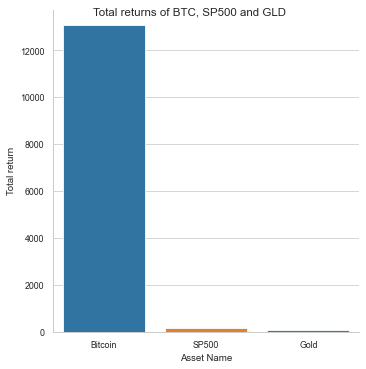

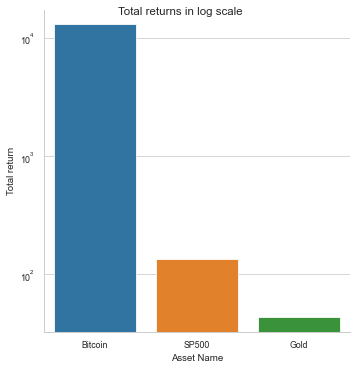

In [ ]:
# Lets visually represent the data from total returns and avg vol in a bar chart:
t= sns.catplot(x="Asset Name", y="Total return", data=T_returns, kind="bar")
t.fig.suptitle("Total returns of BTC, SP500 and GLD")
# Bar chart in logarithmic scale:
l= sns.catplot(x="Asset Name", y="Total return", data=T_returns, kind="bar")
l.fig.suptitle("Total returns in log scale")
l.set(yscale="log")

From the bar charts showed above, we can see how BTC's total returns dwarf the ones of SP500 and GLD, so that we have to convert the chart to logarithmic scale to get a better visual representation


From the table that shows the total returns and average volatility of BTC, SP500, and GLD, we can see that BTC has much higher returns during our timeframe (Sep 2014 - Nov 2021) than SP500 (13080% vs 134%) and GLD (13080% vs 18%), albeit also with much higher volatility ( BTC 148%, SP500 25%, GLD 18%).

## Markowitz Efficient Frontier analysis
In the following cells, we will preform portfolio analysis as per Markowitz's Efficient Frontier, to obtain the optimal weights of assets in our portfolio.

In [ ]:
# Markowitz Efficient Frontier analysis
import pandas_datareader.data as web
import datetime
import numpy as np

btc_merged=bitcoin.merge(monthly_data, on='date', how='outer')
btc_merged=btc_merged.dropna()
btc_merged2= btc_merged.merge(sp500, on="date", how="outer")

Merged_close = pd.concat([btc_merged["close"], btc_merged["close"], btc_merged["gold_usd"]], axis=1)
Merged_close.columns = ["BTC", "SP500", "GLD"]

returns = Merged_close.pct_change()
print(returns)



           BTC     SP500       GLD
14         NaN       NaN       NaN
45   -0.150844 -0.150844 -0.038537
75    0.164225  0.164225  0.020424
106  -0.171383 -0.171383  0.040729
137  -0.277732 -0.277732 -0.014594
...        ...       ...       ...
2479 -0.084853 -0.084853 -0.072679
2510  0.190717  0.190717  0.023777
2541  0.221943  0.221943 -0.000165
2571 -0.014946 -0.014946 -0.032752
2602  0.267836  0.267836  0.015991

[86 rows x 3 columns]


In [ ]:
no_of_portfolios = 1000
weight = np.zeros((no_of_portfolios, 3))
exp_Return = np.zeros(no_of_portfolios)
exp_Vol = np.zeros(no_of_portfolios)
sharpe_ratio = np.zeros(no_of_portfolios)

mean_Returns = returns.mean()
sigma = returns.cov()

for k in range(no_of_portfolios):
    # generate random weight vector
    w = np.array(np.random.random(3))
    w = w/np.sum(w)
    weight[k,:] = w
    # compute expected returns
    exp_Return[k] = np.sum(mean_Returns * w) 
    # compute expected volatility
    exp_Vol[k] = np.sqrt (np.dot(w.T, np.dot(sigma, w)))
    # Sharpe ratio
    sharpe_ratio[k] = exp_Return[k] /  exp_Vol[k]
 


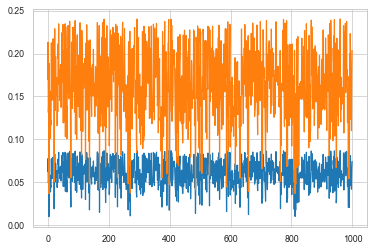

In [ ]:
plt.plot(exp_Return)

plt.plot(exp_Vol)

In [ ]:
# Getting the ideal weights:
max_index = sharpe_ratio.argmax()
weight[max_index,:]

array([0.23133673, 0.04063412, 0.72802915])

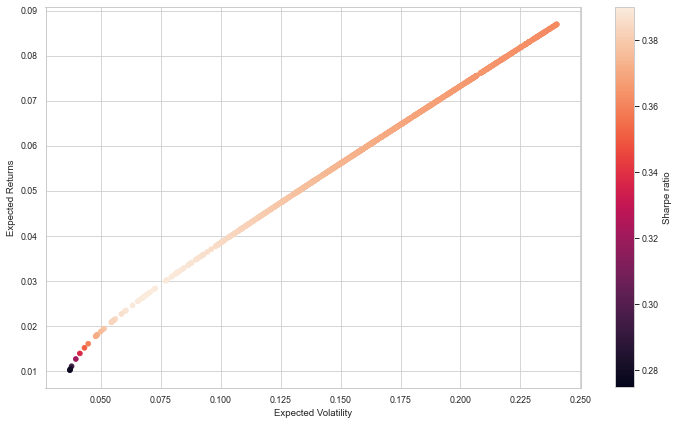

In [ ]:
# Plotting the scatterplot Volatility vs Returns:
plt.figure(figsize=(12,7))
plt.scatter( exp_Vol, exp_Return, c= sharpe_ratio)
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Returns")
plt.colorbar(label= "Sharpe ratio")
plt.show()

As we can see, the optimization model gives us the following portfolio weights:
1) 1% for BTC
2) 26% fo SPY
3) 73% for GLD

## Results/ Correlation with Inflation

The further code calculates the correlation between BTC, SP500, GLD, and inflation. To test the statistical significance we will use Pearson's correlation test. The significance level is set at p<0.05.

### Correlation between BTC and Inflation:

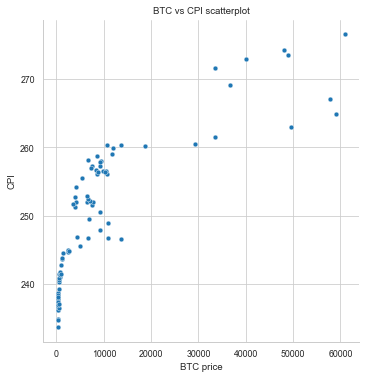

(0.8119509705889506, 2.4431030992526606e-21)

In [ ]:
# Correlation between BTC and Inflation:
import scipy.stats as stats
btc_merged=bitcoin.merge(monthly_data, on='date', how='outer')
btc_merged=btc_merged.dropna() 

sx = sns.relplot(x="close", y="cpi_us", kind="scatter", data=btc_merged)
sx.set(title="BTC vs CPI scatterplot", ylabel= "CPI", xlabel="BTC price")
sns.set_context("paper")
plt.show()

# Pearson correlation test
stats.pearsonr(btc_merged["close"], btc_merged["cpi_us"])


Our null hypothesis is that there is no significant relationship between BTC and CPI. We take p<0.05 for a statistically significant threshold or alpha=0.05.

Since the Pearson correlation test gives us a p-value of 2.4431030992526606e-21 that is <0.05, we conclude that there is a significant positive correlation between BTC and CPI.

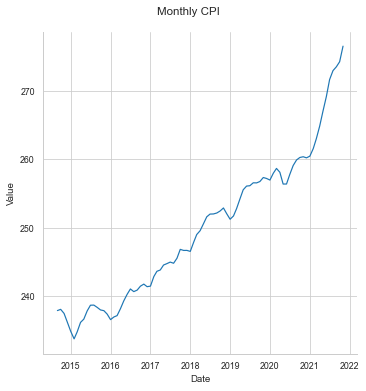

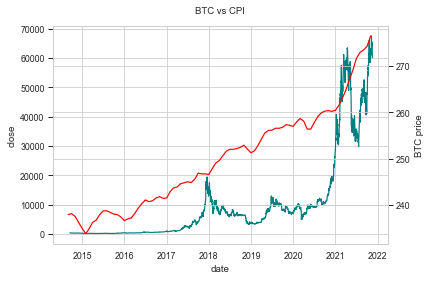

In [ ]:
# Monthly CPI chart
cpi= sns.relplot(x="date", y="cpi_us", kind="line", data=monthly_data)
cpi.fig.suptitle("Monthly CPI ", y=1.04)
cpi.set(xlabel= "Date", ylabel= "Value")
sns.set_style("whitegrid")
sns.set_context("paper")
plt.show()

# CPI and BTC chart overlay
fig, graph = plt.subplots()
b= sns.lineplot(x='date',y='close',ax=graph,data=bitcoin,color='teal')
graph2 = graph.twinx()
c= sns.lineplot(x='date', y='cpi_us',ax=graph2,data=monthly_data,color='red')
c.set_title("BTC vs CPI", y=1.03)
c.set_ylabel("BTC price")
sns.set_context("paper")
plt.show()

From the above charts, we can notice the rise in CPI from 2016 onwards, and how it compares to BTC's price.

In [ ]:
import statsmodels.api as sm
## X stands for the input or independent variables
X= btc_merged["cpi_us"]
## y is the target or dependent variable
y= btc_merged["close"]
## add an intercept (beta_0) to our model 
X= sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.44e-21
Time:                        11:58:27   Log-Likelihood:                -900.69
No. Observations:                  86   AIC:                             1805.
Df Residuals:                      84   BIC:                             1810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.691e+05   2.19e+04    -12.282      0.000   -3.13e+05   -2.26e+05
cpi_us      1116.6647     87.592     12.749      0.000     942.479    1290.850
==============================================================================
Omnibus:                       29.118   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.801
Skew:                           1.320   Prob(JB):                     3.42e-12
Kurtosis:                       5.788   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Again, we can see how <b>CPI</b>
 and <b>BTC</b>
 prices trend in the same direction and have a statistically significant correlation, <i>Pearson test: (0.811, p<0.05)</i>
. 
 
 Moreover, the regression analysis results show how around <b>65.9%</b>
 of BTC's price movement could be explained/correlated with <b>CPI</b>
 (<i>R-squared= 0.659</i>
), with an <b>$1116.66</b>
 increase in <b>BTC</b>
's mean price for every one-unit increase in <b>CPI</b>
 (<i>coeff= 1116.66</i>
). 
 
 <b>But is BTC a good hedge for inflation?</b>
 
 It depends on the given timeframe and risk appetite of the investor. With this much volatility, <b>BTC</b>
 still does not provide a role as a safe store of value. Nevertheless, it still follows Metcalfe's law (value connected with the network effect), and the price outperforms all assets [2].

(0.8336578144239825, 1.2486206706326917e-23)


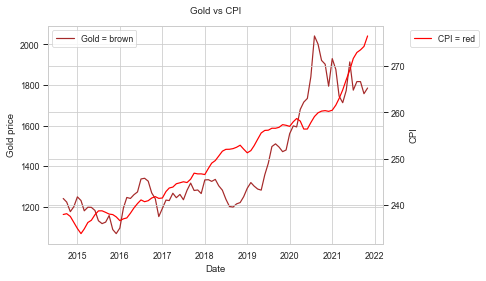

In [ ]:
# Correlation between gold and inflation:
print(stats.pearsonr(monthly_data["gold_usd"], monthly_data["cpi_us"]))

# Gold and CPI chart overlay
fig, graph = plt.subplots()
g= sns.lineplot(x='date',y='gold_usd',ax=graph,data=monthly_data,color='brown', label= "Gold = brown")
g.set(xlabel= "Date", ylabel= "Gold price")
graph2 = graph.twinx()
c= sns.lineplot(x='date', y='cpi_us',ax=graph2,data=monthly_data,color='red', label="CPI = red")
c.legend(bbox_to_anchor= (1.3,1))
c.set_title("Gold vs CPI", y=1.03)
c.set(ylabel="CPI")
sns.set_context("paper")

plt.show()


By looking at the Pearson correlation between Gold price and CPI, we can conclude that there is a statistically significant correlation (<b>p <0.05, correlation level=0.83</b>
). But by looking at the chart from mid-2020 to Nov 2021, gold is diverging from CPI. Other than that, GLD also underperformed vs CPI from 2017 to 2020. 

While gold is an age-old store of value and a "flight to safety" asset, it still underperformed against inflation during the last decade.
Is that because more people see other assets as a better investment or a better hedge against inflation, like Bitcoin?

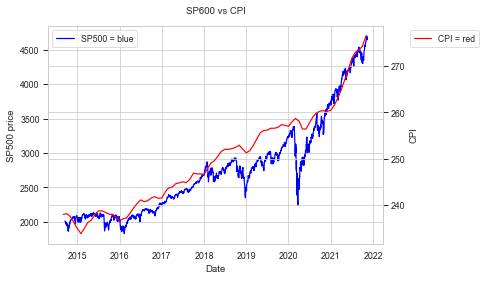

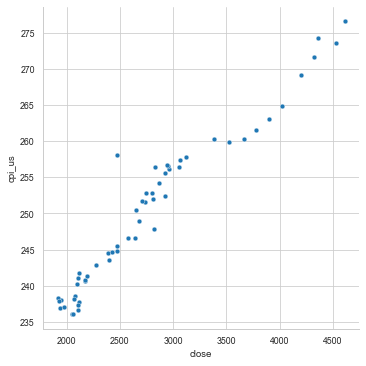

(0.9668888351226076, 1.0451602891478588e-33)


In [ ]:
# SP500 and CPI char overlay
fig, graph = plt.subplots()
s= sns.lineplot(x='date',y='close',ax=graph,data=sp500,color='blue', label= "SP500 = blue")
s.set(xlabel= "Date", ylabel= "SP500 price")
graph2 = graph.twinx()
c= sns.lineplot(x='date', y='cpi_us',ax=graph2,data=monthly_data,color='red', label="CPI = red")
c.legend(bbox_to_anchor= (1.3,1))
c.set_title("SP600 vs CPI", y=1.03)
c.set(ylabel="CPI")

plt.show()

# SP500 and CPI correlation
snp_merged=sp500.merge(monthly_data, on='date', how='outer')
snp_merged=snp_merged.dropna() 

sx = sns.relplot(x="close", y="cpi_us", kind="scatter", data=snp_merged)
sns.set_context("paper")

plt.show()

print(stats.pearsonr(snp_merged["close"], snp_merged["cpi_us"]))


As we can see, SP500 and CPI have a near-perfect correlation (p<0.05, correlation level= 0.97)! ( We can argue how this is logical as CPI increases with the increase in the money supply (*or the velocity of money), and as CPI rises with the FED's balance sheet, so does the SP500.
Therefore, all three assets (BTC, SP500, and Gold) have a statistically significant correlation with CPI (p<0.05), while the level of correlation is the highest for SP500(0.97)>Gold(0.83)>BTC(0.81).


## In conclusion

This report demonstrates and compares the relationship between three assets (BTC, SP500, and GLD) and CPI. This data analysis aimed to answer whether Bitcoin qualifies as a good store of value and a hedge against inflation. The data shows a clear BTC dominance return-wise, with a significant correlation to CPI. Since the CFO wants to lower the volatility in the fund, then BTC can only take a small portion of the portfolio. By the Efficient Markovitz frontier model, the BTC allocation to minimize risk and maximize returns should be 1%.
Additionally, the model reccomends <b> a 26% portfolio allocation to SP500</b> [3].

Conversely, GLD, a known "flight to safety" asset, while behaving poorly as an inflation hedge in the last decade, still has the lowest volatility and a good security profile.<b> A 76% portfolio allocation is recommended for GLD</b>.


## References:

1. https://bitcoin.org/bitcoin.pdf : "Bitcoin: A Peer-to-Peer Electronic Cash System"
2. https://dcresearch.medium.com/metcalfes-law-and-bitcoin-s-value-2b99c7efd1fa : "Metcalfe’s Law and Bitcoin’s Value"
3. https://www.aei.org/carpe-diem/the-sp-500-index-out-performed-hedge-funds-over-the-last-10-years-and-it-wasnt-even-close/ - "The SP 500 index out-performed hedge funds over the last 10 years. And it wasn’t even close"